In [3]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(tibble)
library(lme4)
library(ggsci)
library(ggpubr)
library(LDheatmap)

png 
  2

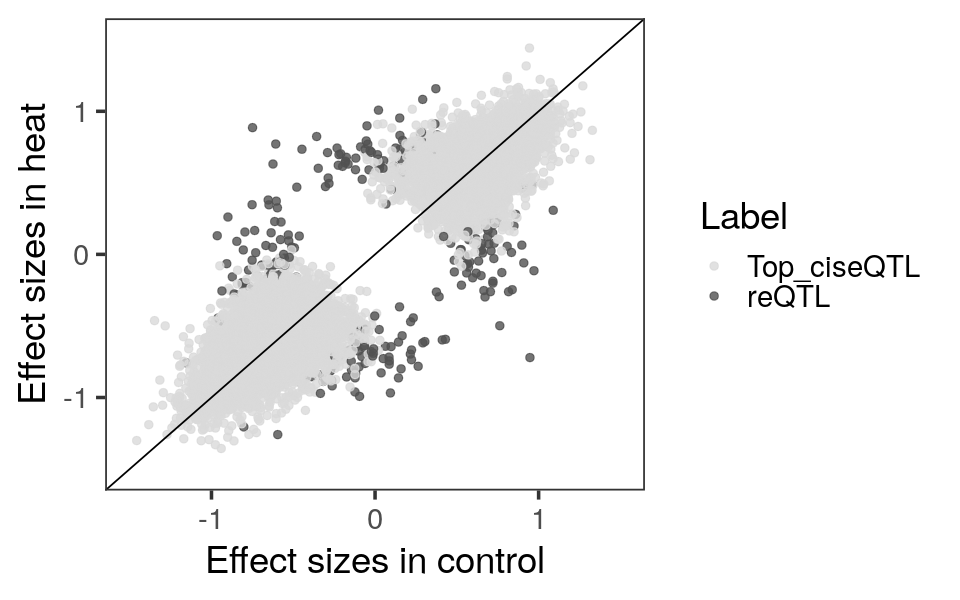

In [53]:
# effect of eQTL classification

control = read.table("allfinalreQTLs/Control-eQTLmatrix-reQTL-effect.txt",sep='\t',head=F)
heat = read.table("allfinalreQTLs/Heat-eQTLmatrix-reQTL-effect.txt",sep='\t',head=F)
cand = read.table("allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.txt")
data = control %>% left_join(heat, by="V1") %>% mutate(Label = ifelse(V1 %in% cand$V8, "reQTL", "Top_ciseQTL"))
data$Label = factor(data$Label, levels=c("Top_ciseQTL","reQTL"))
options(repr.plot.width=8, repr.plot.height=5)
x = ggscatter(data, x="V2.x", y="V2.y", color="Label",alpha=0.8)+theme_bw(base_size = 22)+
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))+xlim(-1.5,1.5)+ylim(-1.5,1.5)+xlab("Effect sizes in control")+ylab("Effect sizes in heat")+
    scale_colour_manual(values = c("#d9d9d9", "#525252"))+geom_abline(intercept = 0, slope = 1)
svg("effectsizes.svg",width=8,height=5)
x
dev.off()
x

In [90]:
data1 %>% filter(Label == 'AltPos') %>% slice(1)
data1 %>% filter(Label == 'BothNeg') %>% slice(1)
data1 %>% filter(Label == 'BothPos') %>% slice(1)
data1 %>% filter(Label == 'RefPos') %>% slice(1)

Gene,SNP,RefCtrlExp,RefHeatExp,AltCtrlExp,AltHeatExp,RefLog2,AltLog2,FDR,AltInb,Refratio,Altratio,Label
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
Zm00001d030549,S1_143282205,42.77469,19.45128,19.68185,57.76665,-1.097906,1.506632,3.060878e-19,Oh43,-1.097906,1.506632,AltPos


Gene,SNP,RefCtrlExp,RefHeatExp,AltCtrlExp,AltHeatExp,RefLog2,AltLog2,FDR,AltInb,Refratio,Altratio,Label
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
Zm00001d004707,S2_132447322,24.04584,19.68229,26.87873,15.76694,-0.2761751,-0.7335456,1.01235e-14,"W22,MS71,PH207",-0.2761751,-0.7335456,BothNeg


Gene,SNP,RefCtrlExp,RefHeatExp,AltCtrlExp,AltHeatExp,RefLog2,AltLog2,FDR,AltInb,Refratio,Altratio,Label
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
Zm00001d017187,S5_188281889,20.88986,42.03949,14.73504,103.1108,0.975398,2.726068,2.130879e-17,"HP301,MS71",0.975398,2.726068,BothPos


Gene,SNP,RefCtrlExp,RefHeatExp,AltCtrlExp,AltHeatExp,RefLog2,AltLog2,FDR,AltInb,Refratio,Altratio,Label
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
Zm00001d050910,S4_130225335,41.2182,43.92367,52.50814,41.92179,0.08961056,-0.3180482,2.259587e-11,"Oh43,PH207",0.08961056,-0.3180482,RefPos


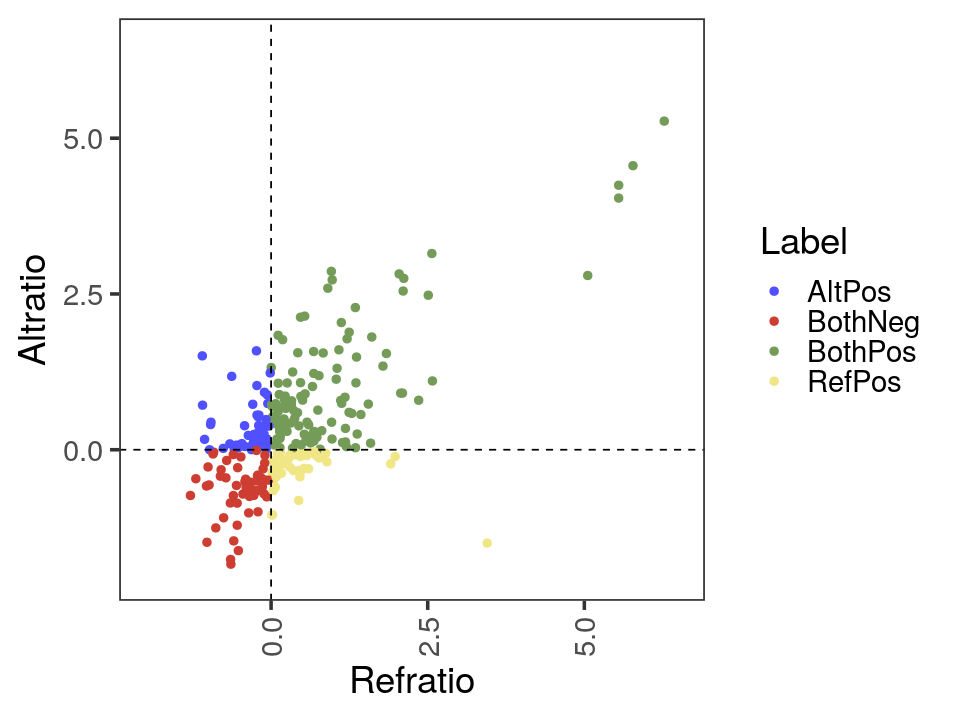

In [3]:
data = read.table("allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.validation.txt",sep=' ',head=T)
data1 = data %>% mutate(Refratio = log2((RefHeatExp+1)/(RefCtrlExp+1)), 
                        Altratio = log2((AltHeatExp+1)/(AltCtrlExp+1))) %>% 
        mutate(Label=ifelse(Refratio < 0 & Altratio < 0, "BothNeg", 
                            ifelse(Refratio >=0 & Altratio < 0, "RefPos",
                                  ifelse(Refratio >=0 & Altratio >= 0, "BothPos", "AltPos"))))
options(repr.plot.width=8, repr.plot.height=6)
x = ggscatter(data1, x="Refratio", y="Altratio", color="Label")+xlim(-2,6.5)+ylim(-2,6.5)+
    theme_bw(base_size = 22)+geom_hline(yintercept=0, linetype="dashed", color = "black")+
    geom_vline(xintercept=0, linetype="dashed", color = "black")+  
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+scale_color_igv()
#svg("reGene-classification.svg",width=8,height=6)
#x
#dev.off()
x

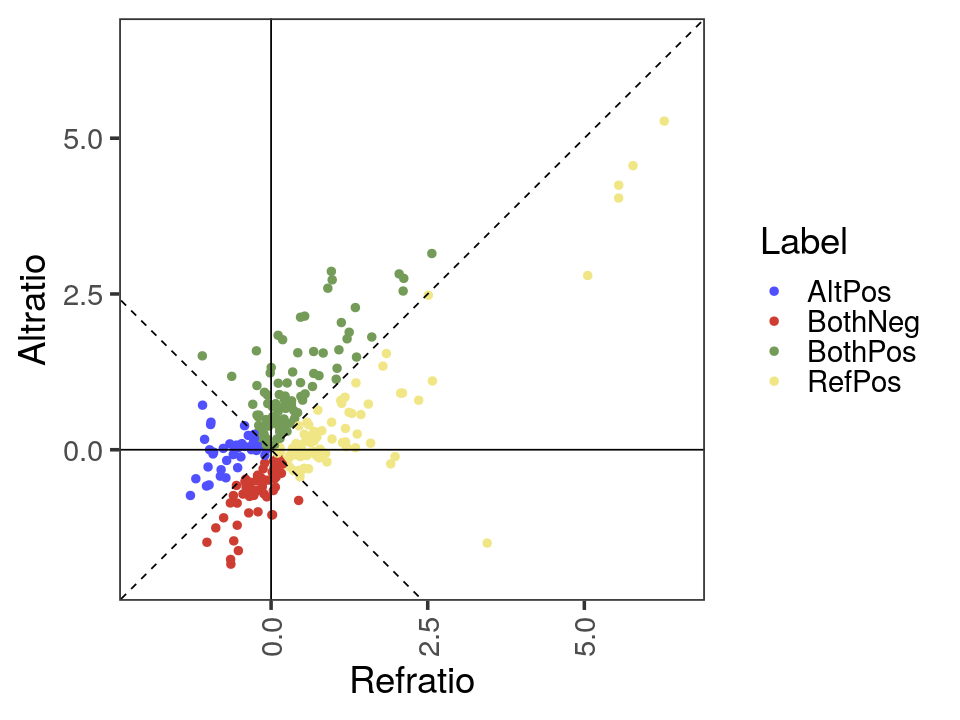

In [4]:
data = read.table("allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.validation.txt",sep=' ',head=T)
data1 = data %>% mutate(Refratio = log2((RefHeatExp+1)/(RefCtrlExp+1)), 
                        Altratio = log2((AltHeatExp+1)/(AltCtrlExp+1))) %>% 
        mutate(Label=ifelse(Refratio > Altratio & Refratio < -Altratio, "BothNeg", 
                            ifelse(Refratio > Altratio & Refratio >= -Altratio, "RefPos",
                                  ifelse(Refratio < Altratio & Refratio >= -Altratio, "BothPos", "AltPos"))))
options(repr.plot.width=8, repr.plot.height=6)
x = ggscatter(data1, x="Refratio", y="Altratio", color="Label")+xlim(-2,6.5)+ylim(-2,6.5)+
    theme_bw(base_size = 22)+geom_abline(intercept = 0, slope = 1,linetype="dashed", color = "black")+
    geom_abline(intercept = 0, slope = -1, linetype="dashed", color = "black")+
    geom_hline(yintercept=0, color = "black")+
    geom_vline(xintercept=0, color = "black")+  
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+scale_color_igv()
#svg("reGene-classification.svg",width=8,height=6)
#x
#dev.off()
x

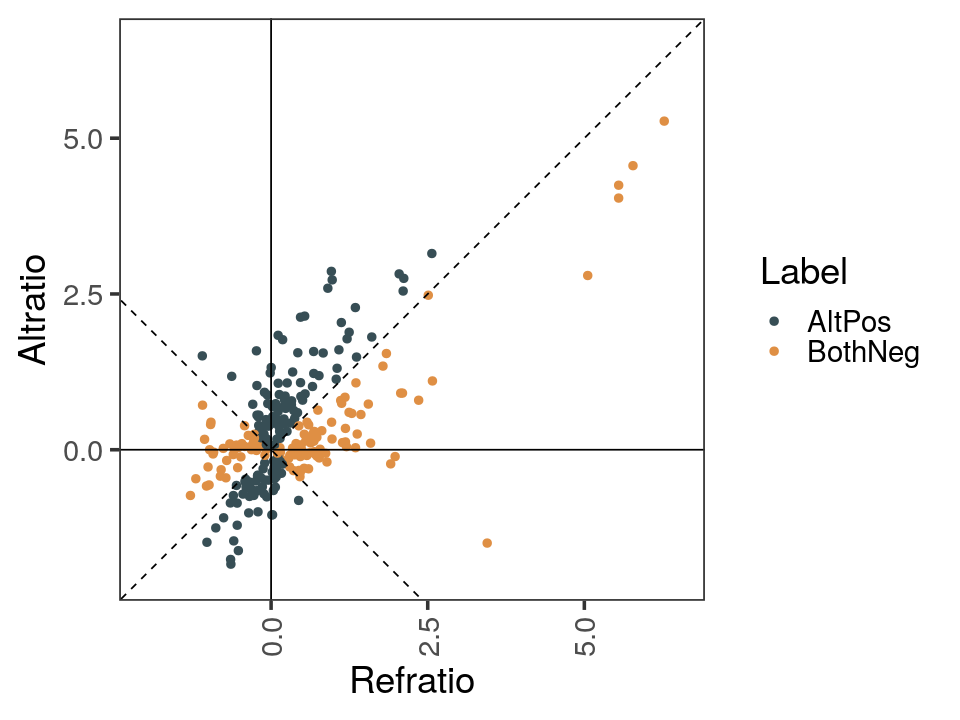

In [56]:
data = read.table("allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.validation.txt",sep=' ',head=T)
data1 = data %>% mutate(Refratio = log2((RefHeatExp+1)/(RefCtrlExp+1)), 
                        Altratio = log2((AltHeatExp+1)/(AltCtrlExp+1))) %>% 
        mutate(Label=ifelse(abs(Refratio) > abs(Altratio), "BothNeg","AltPos"))
options(repr.plot.width=8, repr.plot.height=6)
x = ggscatter(data1, x="Refratio", y="Altratio", color="Label")+xlim(-2,6.5)+ylim(-2,6.5)+
    theme_bw(base_size = 22)+geom_abline(intercept = 0, slope = 1,linetype="dashed", color = "black")+
    geom_abline(intercept = 0, slope = -1, linetype="dashed", color = "black")+
    geom_hline(yintercept=0, color = "black")+
    geom_vline(xintercept=0, color = "black")+  
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+scale_color_jama()
#svg("reGene-classification.svg",width=8,height=6)
#x
#dev.off()
x

In [60]:
data1 %>% filter(RefHeatExp > RefCtrlExp | AltHeatExp > AltCtrlExp) %>% pull(Gene) %>% unique() %>% length()

[1] 202

In [16]:
x = data1 %>% filter(Label=='AltPos')
y = data1 %>% filter(Label=='BothNeg')
length(unique(data1$Gene))
length(unique(x$Gene))
length(unique(y$Gene))
intersect(x$Gene, y$Gene)
data1 %>% filter(Gene == 'Zm00001d030549')

[1] 258

[1] 143

[1] 120

[1] "Zm00001d030549" "Zm00001d029218" "Zm00001d020727" "Zm00001d031065"
[5] "Zm00001d004976"

Gene,SNP,RefCtrlExp,RefHeatExp,AltCtrlExp,AltHeatExp,RefLog2,AltLog2,FDR,AltInb,Refratio,Altratio,Label
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
Zm00001d030549,S1_143282205,42.77469,19.45128,19.68185,57.76665,-1.097906,1.5066322,3.060878e-19,Oh43,-1.097906,1.5066322,AltPos
Zm00001d030549,S1_143976335,45.00124,20.54832,24.20493,40.38506,-1.094097,0.7154042,2.684939e-06,"Mo17,Oh43",-1.094097,0.7154042,BothNeg


In [4]:
geno = read.table("../../Genotypes/Selected-102genos-Widiv-filtered-MAF01-Het01-SNP+InDel.correctalleleDec2021.LDheatmapformat.geno",sep='\t',head=T,check.names = F)
head(geno)

,Chrom,Pos,2369,2MA22,33-16,3IJI1,4226,4F-234-BX-4,6M502,764,⋯,PHJ40,PHK42,PHJ33,PHR36,PHWG5,PHV63,PHW30,PHW43,PHW52,PHW79
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,43699,A/A,A/A,A/A,T/T,A/A,T/T,A/A,A/A,⋯,A/A,T/T,A/A,A/A,A/A,A/A,A/A,A/A,T/T,T/T
2,1,43964,A/A,A/A,T/T,A/A,A/A,A/A,A/A,A/A,⋯,A/A,A/A,T/T,T/T,A/A,A/A,T/T,T/T,A/A,A/A
3,1,45511,A/A,A/A,A/A,A/A,A/A,A/A,T/T,A/A,⋯,A/A,A/A,A/A,A/A,A/A,T/T,A/A,A/A,A/A,A/A
4,1,45948,A/A,A/A,T/T,A/A,A/A,A/A,A/A,A/A,⋯,A/A,A/A,T/T,T/T,A/A,A/A,T/T,T/T,A/A,A/A
5,1,46044,A/A,A/A,A/A,A/A,A/A,A/A,T/T,A/A,⋯,A/A,A/A,A/A,A/A,A/A,T/T,A/A,A/A,A/A,A/A
6,1,46912,A/A,A/A,A/A,A/A,A/A,A/A,T/T,A/A,⋯,A/A,A/A,A/A,A/A,A/A,T/T,A/A,A/A,A/A,A/A


In [13]:
geno %>% filter(Chrom == 3 & Pos > 155323793 & Pos < 155342000) %>% pull(Pos)

[1] 155333329 155333341 155333350 155333355 155333407 155333449 155333520
 [8] 155333551 155333659 155333793 155333936 155334312 155334412 155334574
[15] 155334829 155334858 155334880 155334961 155334995 155335088 155335166
[22] 155335188 155335191 155335422 155335569 155335805 155336021 155336133
[29] 155336268 155336419 155336573 155336702 155336836 155337028 155337034
[36] 155337137 155337183 155337196 155337213 155337743 155337770 155337880
[43] 155338065 155338152 155338158 155338179 155338863 155339113 155339179
[50] 155339358 155339535 155340213 155340222 155340249 155340300 155340528
[57] 155340693 155341317 155341357 155341401 155341424 155341680 155341685
[64] 155341985

[1] 155333329 155333341 155333350 155333355 155333407 155333449 155333520
 [8] 155333551 155333659 155333793 155333936 155334312 155334412 155334574
[15] 155334829 155334858 155334880 155334961 155334995 155335088 155335166
[22] 155335188 155335191 155335422 155335569 155335805 155336021 155336133
[29] 155336268 155336419 155336573 155336702 155336836 155337028 155337034
[36] 155337137 155337183 155337196 155337213 155337743 155337770 155337880
[43] 155338065 155338152 155338158 155338179 155338863 155339113 155339179
[50] 155339358 155339535 155340213 155340222 155340249 155340300 155340528
[57] 155340693 155341317 155341357 155341401 155341424 155341680 155341685
[64] 155341985

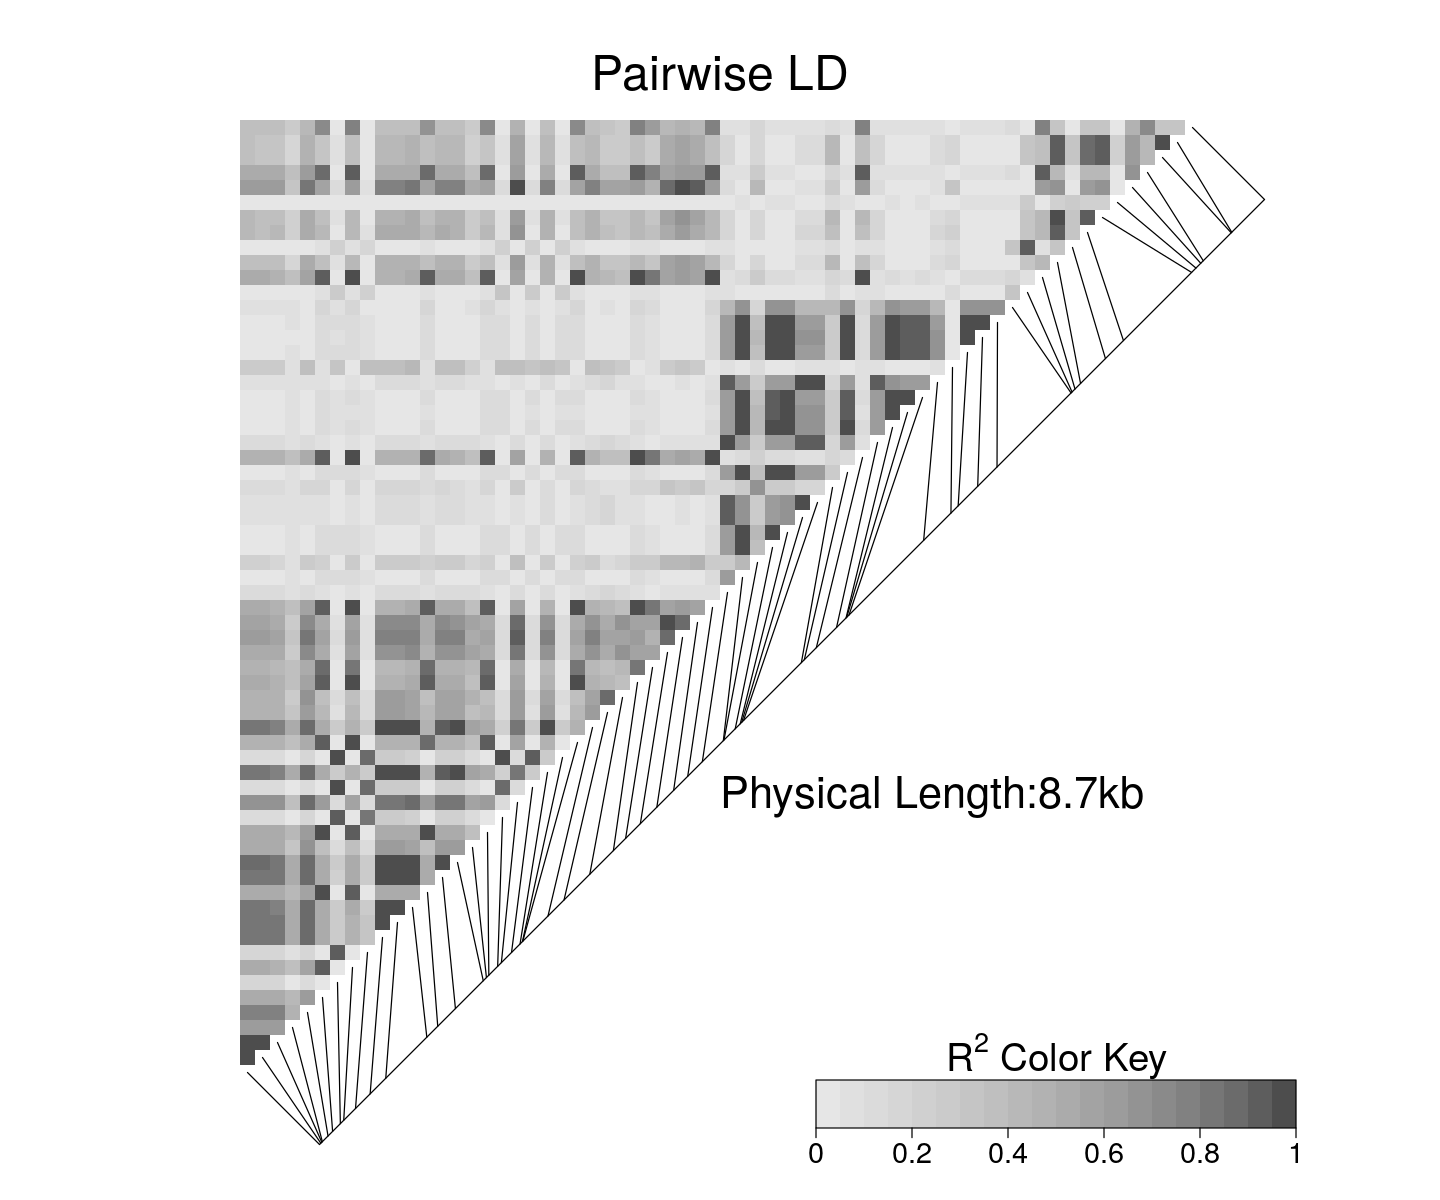

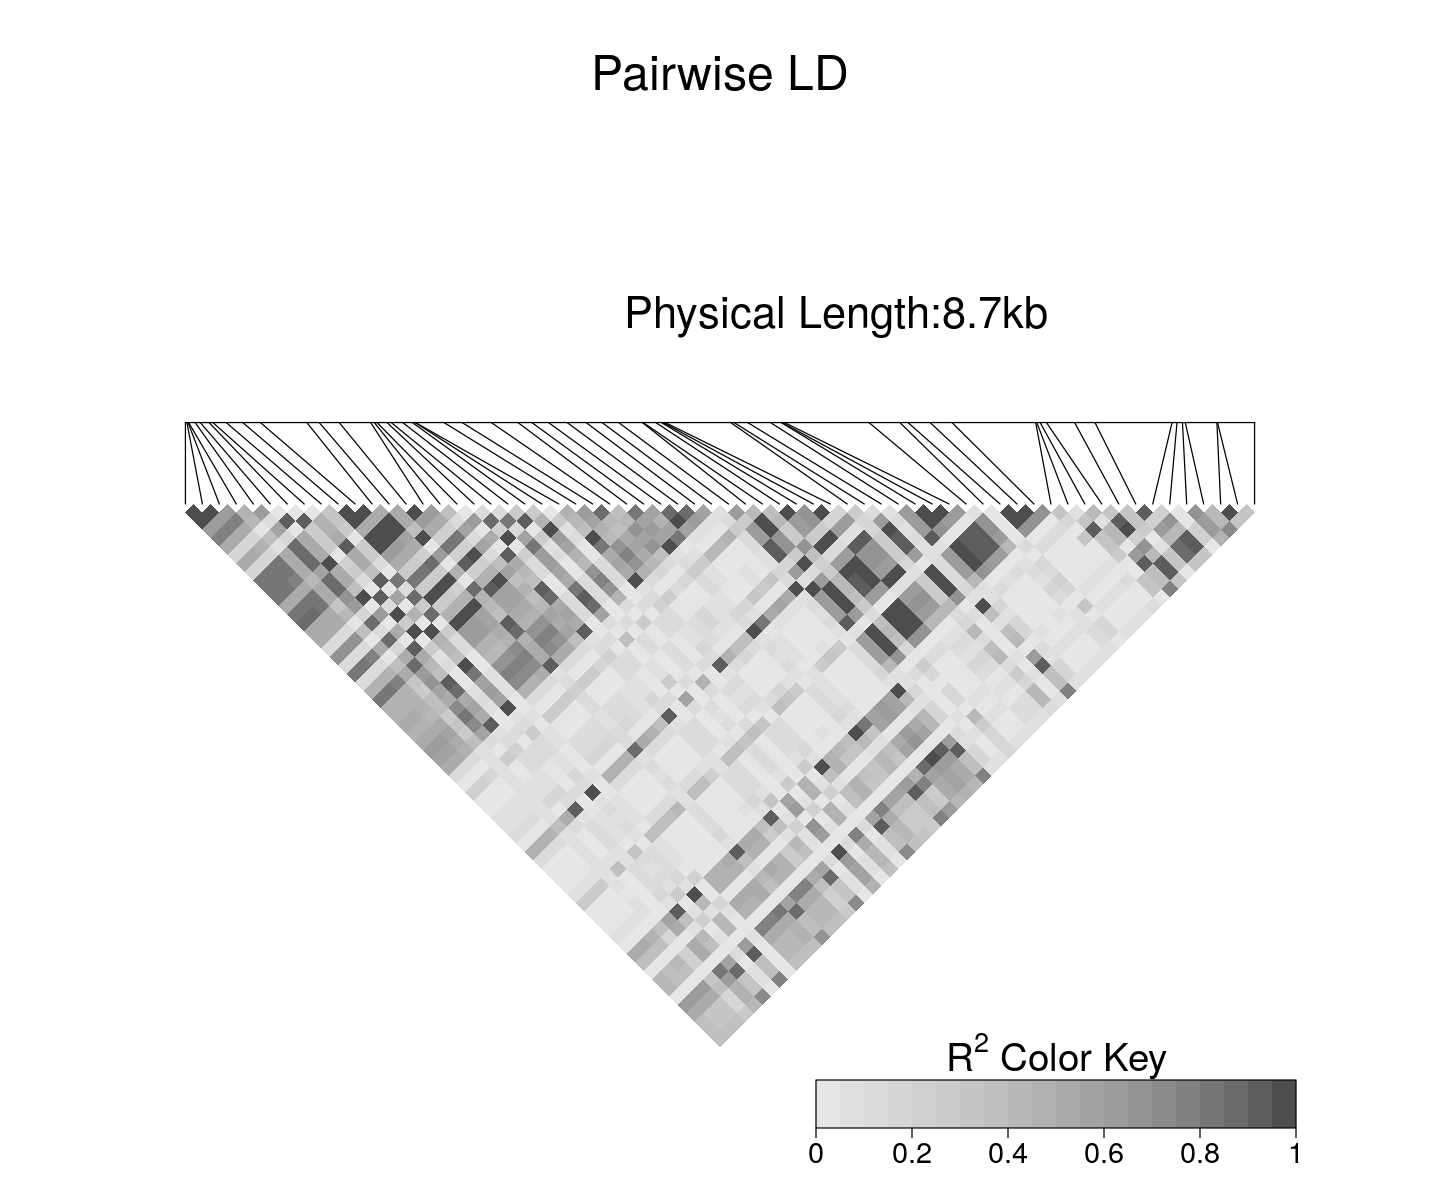

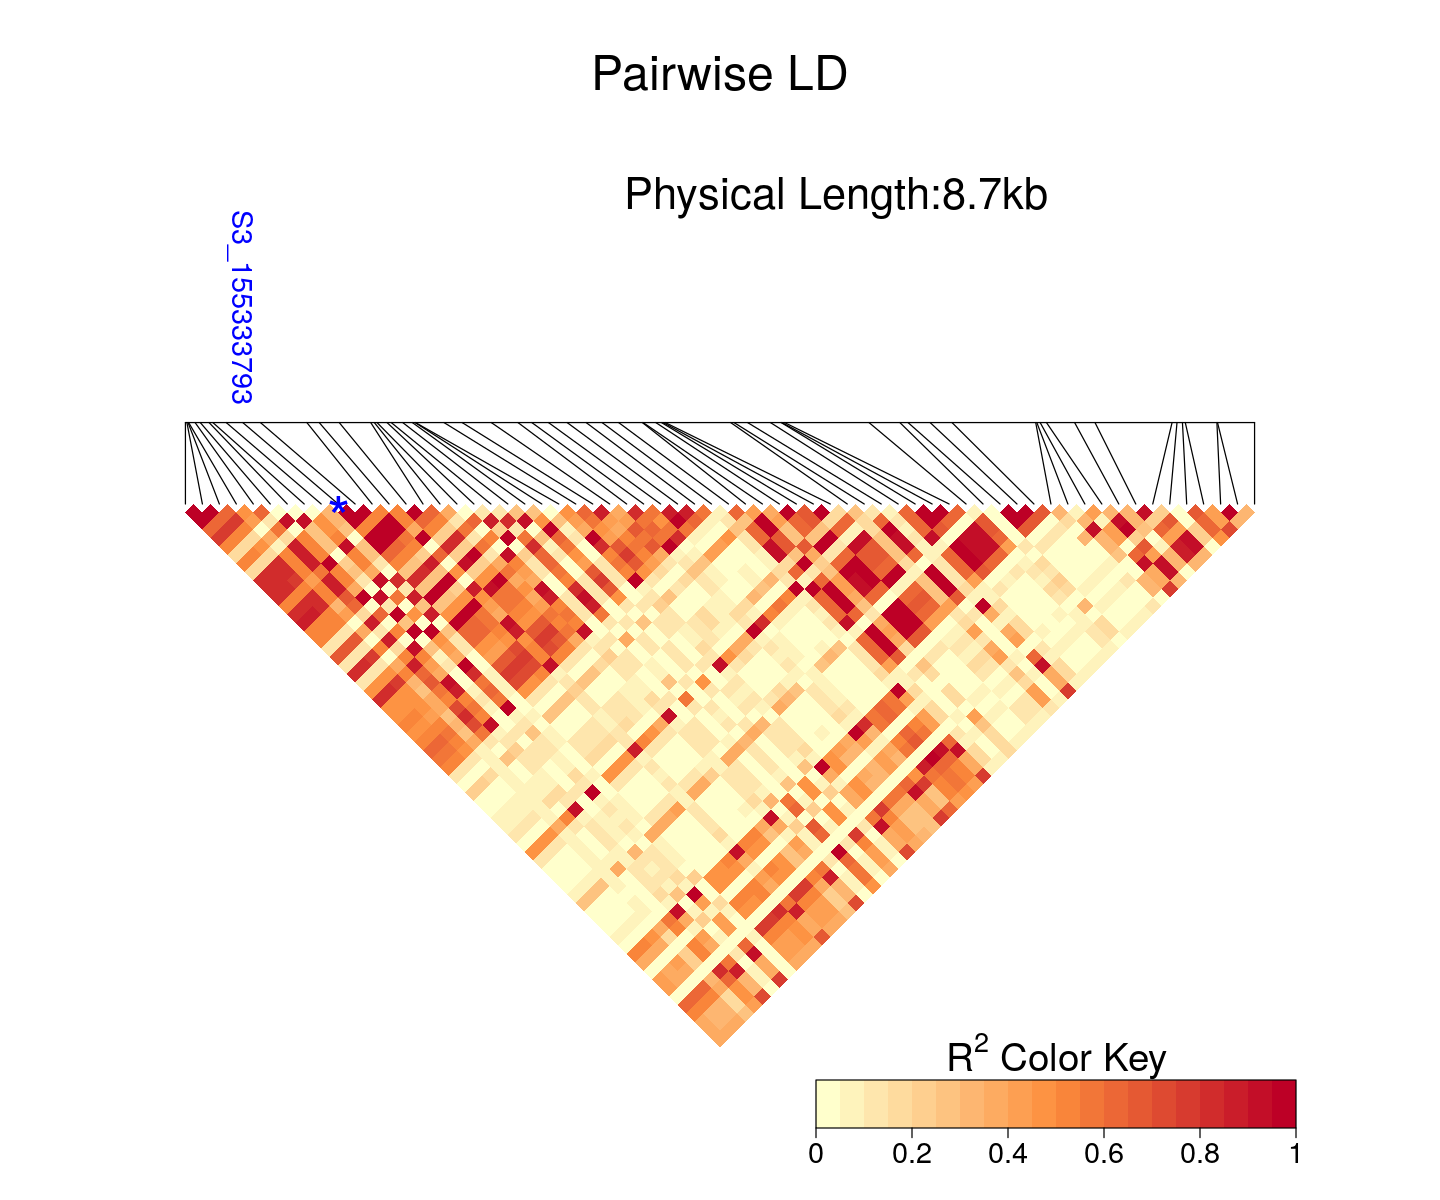

In [11]:
library(RColorBrewer)
#S1_143282205 --> Chrom == 1 & Pos > 143200000 & Pos < 143350000 start snp: 143228402; stop snp: 143321853
#S3_155333793 --> Chrom == 3 & Pos > 155323793 & Pos < 155342000 start snp: 155333329; stop snp: 155341985
subgeno = geno %>% filter(Chrom == 3 & Pos > 155323793 & Pos < 155342000) %>% 
    mutate(myID = paste(paste("S",Chrom,sep=""), Pos, sep="_")) %>% dplyr::select(-Chrom, -Pos) %>% column_to_rownames(var="myID") %>% t() %>% data.frame()
subpos = geno %>% filter(Chrom == 3 & Pos > 155323793 & Pos < 155342000) %>% pull(Pos)
#S6_164798118
subpos
library("genetics")
for(i in 1:ncol(subgeno)){
 subgeno[,i] <- as.genotype(subgeno[,i])
}
options(repr.plot.width=12, repr.plot.height=10)
rgb.palette <- colorRampPalette(rev(c("#ffffcc", "#fd8d3c", "#bd0026")), space = "rgb")
MyHeatmap <- LDheatmap(subgeno, genetic.distances = subpos)
flippedHeatmap<-LDheatmap(MyHeatmap,flip=TRUE)
LDheatmap(flippedHeatmap, SNP.name = "S3_155333793",color=rgb.palette(20))

In [105]:
svg("Zm00001d030549-LD.svg",width=12,height=10)
LDheatmap(flippedHeatmap, SNP.name = "S1_143282205",color=rgb.palette(20))
dev.off()

png 
  2

In [19]:
data = read.table("cis-reQTL-detection-twogeneexamples.txt")
Zm00001d042183 = data %>% select(Pr..F., name) %>% separate(name, c("Gene","SNP"), sep=":") %>% filter(Gene == 'Zm00001d042183')
Zm00001d030549 = data %>% select(Pr..F., name) %>% separate(name, c("Gene","SNP"), sep=":") %>% filter(Gene == 'Zm00001d030549')
options(repr.plot.width=12, repr.plot.height=2)
x1 = ggplot(data=Zm00001d042183, aes(x=c(1:nrow(Zm00001d042183)), y=log10(Pr..F.)*(-1))) +
  geom_line()+
  geom_point()+theme_bw(base_size = 22)+  
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
x2 = ggplot(data=Zm00001d030549, aes(x=c(1:nrow(Zm00001d030549)), y=log10(Pr..F.)*(-1))) +
  geom_line()+
  geom_point()+theme_bw(base_size = 22)+  
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
svg("Zm00001d042183.svg",width=12,height=2)
x1
dev.off()
svg("Zm00001d030549.svg",width=12,height=2)
x2
dev.off()

png 
  2

png 
  2

png 
  2

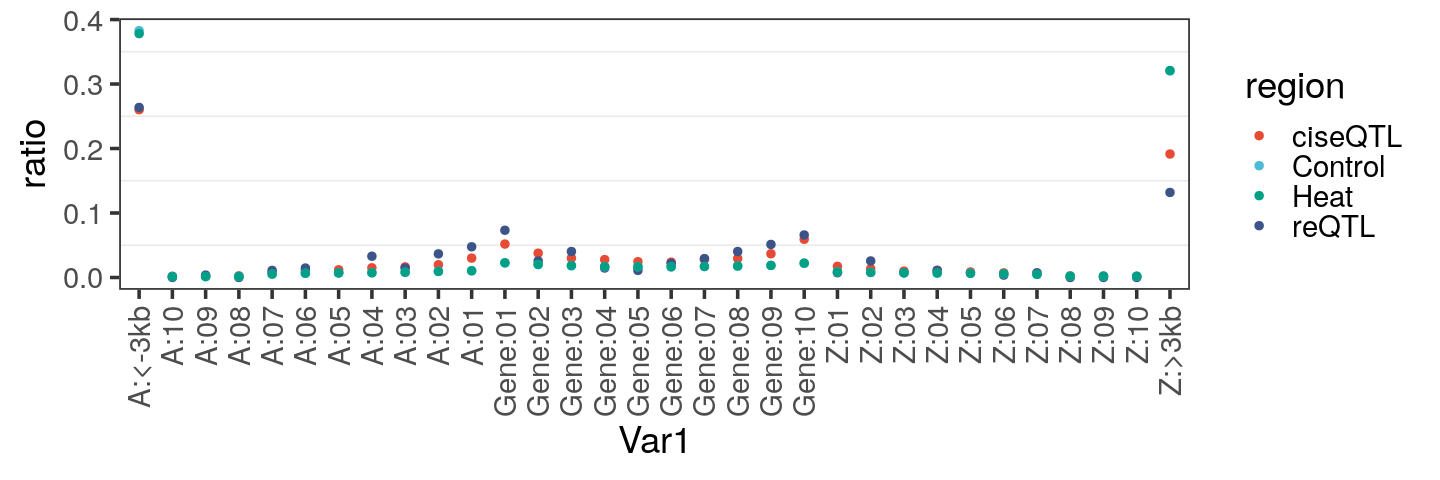

In [70]:
control = read.table("Control-eQTLmatrix-1e-3-newclassify-cistrans-cis.distribution.txt",sep='\t',head=F)
heat = read.table("Heat-eQTLmatrix-1e-3-newclassify-cistrans-cis.distribution.txt",sep='\t',head=F)
cdata = data.frame(table(control$V2)) %>% slice(-1) %>% mutate(region = 'Control')
hdata = data.frame(table(heat$V2)) %>% slice(-1) %>% mutate(region = 'Heat')
cdata$Var1 = factor(cdata$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
hdata$Var1 = factor(hdata$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
data = data.frame(rbind(x3, y1, cdata, hdata))
data1 = data %>% group_by(region) %>% mutate(ratio = Freq/sum(Freq)) %>% ungroup()
options(repr.plot.width=12, repr.plot.height=4)
fig = ggscatter(data1,"Var1","ratio",color="region")+theme_bw(base_size = 22)+  
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+scale_color_npg()
svg("reQTL-distribution.svg",width=12,height=4)
fig
dev.off()
fig

,V1,V2
,<fct>,<fct>
1,Zm00001d002125:S2_6291804,Gene:01
2,Zm00001d002889:S2_25919086,Gene:07
3,Zm00001d002942:S2_27771339,A:<-3kb
4,Zm00001d003252:S2_38332012,A:<-3kb
5,Zm00001d003559:S2_48114808,A:<-3kb
6,Zm00001d003867:S2_64013148,Gene:09


,V1,V2
,<fct>,<fct>
1,ENSRNA049458957:S5_195879558,Z:>3kb
2,ENSRNA049458957:S5_195864845,A:<-3kb
3,ENSRNA049459076:S5_195864265,A:<-3kb
4,ENSRNA049459076:S5_195873535,Z:10
5,ENSRNA049459101:S5_195640520,A:<-3kb
6,ENSRNA049459101:S5_195879594,Z:>3kb


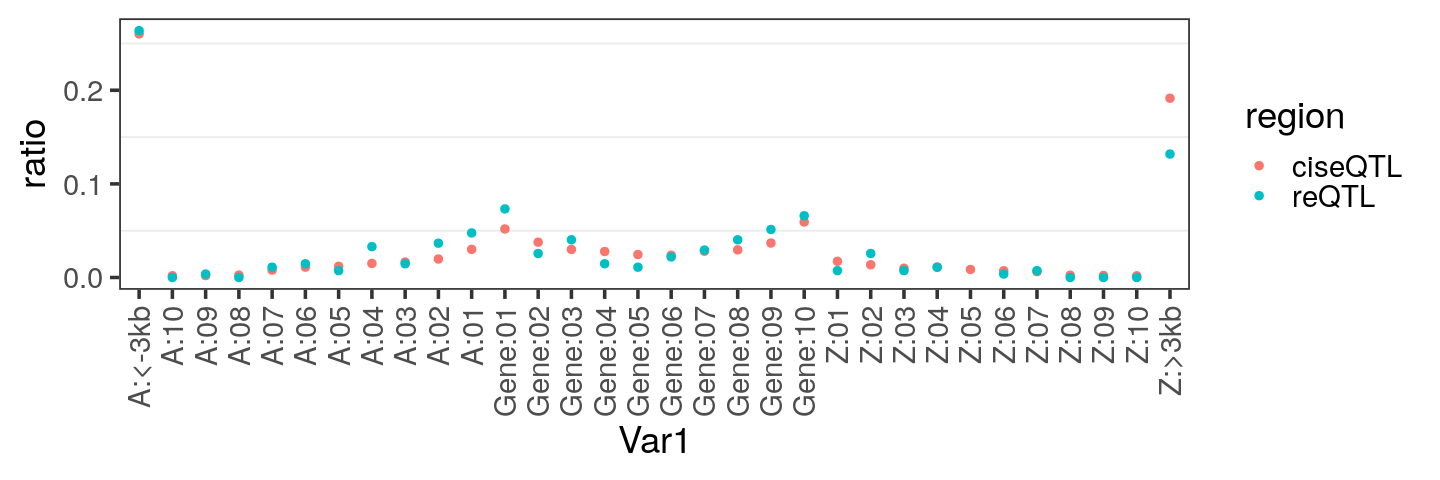

In [60]:
# reQTL distribution
r1 = read.table("allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.distribution.txt",head=F,sep='\t')
head(r1)
r2 = read.table("allfinalreQTLs/cis-reQTL-control-heat-select-candidate-Dec-all-results.distribution.txt",sep='\t',head=F)
r3 = r2 %>% filter(!V1 %in% r1$V1)
head(r3)
x1 = data.frame(table(r1$V2))
x2 = data.frame(table(r2$V2))
x3 = data.frame(table(r3$V2)) %>% mutate(region='ciseQTL')
add = data.frame(Var1 = c('A:08','A:10','Z:08','Z:09','Z:10'), Freq=c(0,0,0,0,0))
y1 = data.frame(rbind(x1, add)) %>% mutate(region='reQTL')
data = data.frame(rbind(x3, y1))
y1$Var1 = factor(y1$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
x3$Var1 = factor(x3$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
data$Var1 = factor(data$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
options(repr.plot.width=12, repr.plot.height=4)
data1 = data %>% group_by(region) %>% mutate(ratio = Freq/sum(Freq)) %>% ungroup()
#ggscatter(y1,"Var1","Freq")+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size=8))
#ggscatter(x3,"Var1","Freq")+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size=8))
ggscatter(data1,"Var1","ratio",color="region")+theme_bw(base_size = 22)+  
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [20]:
# validation
reqtl = read.table("cis-reQTL-control-heat-select-candidate-finalreQTLs.txt",head=T)
dim(reqtl)
newdata = reqtl[order(reqtl$adjpvalue),]
colnames(newdata)[8] = "Combine"
head(newdata)
totalfull = read.table("cis-reQTL-control-heat-select-candidate-finalreQTLs.addaltgeno.txt")
colnames(totalfull)[1] = 'Combine'
final = newdata %>% left_join(totalfull, by="Combine") %>% select(-V1,-V2.x,-V3.x,-V4.x,-V5.x,-V6.x,-Pr)
final[c(1:30),]
fdata = final[c(1:30),]
write.table(fdata, file="cis-reQTL-control-heat-validation-selected30.txt",sep='\t')

[1] 328   9

,V1,V2,V3,V4,V5,V6,Pr,Combine,adjpvalue
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
191,S1_143282205:Condition,23.71476,23.71476,1,69.80063,244.2369,1.726469e-24,Zm00001d030549:S1_143282205,4.605009e-20
134,S5_188281889:Condition,24.99189,24.99189,1,70.07258,200.3367,3.110359e-22,Zm00001d017187:S5_188281889,8.295951e-18
147,S7_2087071:Condition,24.44130,24.44130,1,74.42468,182.2563,1.067767e-21,Zm00001d018660:S7_2087071,2.847841e-17
73,S2_209759860:Condition,19.27772,19.27772,1,65.49101,192.6429,3.534081e-21,Zm00001d006488:S2_209759860,9.425395e-17
59,S2_132447322:Condition,14.53597,14.53597,1,73.17715,139.6729,1.232293e-18,Zm00001d004707:S2_132447322,3.286403e-14
264,S3_155333793:Condition,14.09713,14.09713,1,63.22647,149.5635,2.580691e-18,Zm00001d042183:S3_155333793,6.882187e-14


,Combine,adjpvalue,V2.y,V3.y,V4.y,V5.y,V6.y,V7
,<fct>,<dbl>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,Zm00001d030549:S1_143282205,4.605009e-20,Chr1,143282005,143282405,NA,2MA22;33-16;PHW80;Va26;Va99;VaW6;H99;DKFBHJ;DKIB014;Oh40B;Oh43;W606S;PHWG5;PHV63;PHW30,>2kb
2,Zm00001d017187:S5_188281889,8.295951e-18,Chr5,188281689,188282089,NA,4226;6M502;PHW80;SG-30A;B104;Va35;78010;W9;Yu796-NS;A334;A427;A659;B103;B115;B14A;B2;B-28;B88;C103;CO257;DE3;DK4676A;DKFBHJ;FC46;H96;HP301;Ia-453;LH185;M14;Mo45;MoG;MS200;MS225;MS71;Mo44;N217;N542;NC250;NC342;ND259;NK778;NY6371;PHB09;PHG80;PHG84;PHJ33;PHV63;PHW52;PHW79,CDS
3,Zm00001d018660:S7_2087071,2.847841e-17,Chr7,2086871,2087271,S7_2086985;S7_2086898;S7_2086881;S7_2087033;S7_2087201;S7_2087193,2369;2MA22;764;PHW80;TZU-CHIAO-HSI-WU-105;78010;VaW6;W37A;W610S;Os420;A334;A659;B103;B115;B14A;B-28;B85;B97;C103;F2834T;FR19;H121;LH184;LH146Ht;LH82;M14;Mo1W;Mo45;MoG;MS200;MS225;MS71;Mo44;N217;N542;NC230;B73;NC250;NC342;NK778;NS701;Os426;PHB09;PHG80;PHG84;PHJ40;PHWG5;PHW43;PHW52;PHW79,CDS
4,Zm00001d006488:S2_209759860,9.425395e-17,Chr2,209759660,209760060,NA,2MA22;4F-234-BX-4;W182E;W22;W37A;W552;Yu796-NS;A659;B115;C103;H121;Ia-453;LH146Ht;Mo1W;MS200;ND259;NY6371;W606S;Pa875;PHG80,CDS
5,Zm00001d004707:S2_132447322,3.286403e-14,Chr2,132447122,132447522,S2_132447362,3IJI1;W182E;W22;W610S;Os420;A239;A427;B103;B14A;B-28;B85;B97;DKIB014;F2834T;H121;LH82;Mo1W;MoG;MS225;MS71;N542;ND259;NK778;NY6371;Oh40B;Os426;PH207;PHB09;PHG84;PHJ33;PHR36;PHWG5;PHW30;PHW52,intron
6,Zm00001d042183:S3_155333793,6.882187e-14,Chr3,155333593,155333993,S3_155333659;S3_155333936,33-16;3IJI1;6M502;PHW86;SG-30A;Va99;W22;W37A;H99;W9;Yu796-NS;B2;B-28;B88;DK4676A;DKFBHJ;DKIB014;FC46;HP301;Ia-453;K47;LH215;Mo1W;MoG;ND259;Oh40B;Oh43;PH207;PHG80;PHG84;PHWG5;PHV63;PHW30;PHW43;PHW79,upstream
7,Zm00001d005834:S2_190350649,8.199067e-14,Chr2,190350449,190350849,S2_190350764;S2_190350758;S2_190350662,2MA22;3IJI1;PHW80;Va26;Va99;W182E;W22;H99;Yu796-NS;A427;B-28;B85;B88;C103;CO257;DE3;FC46;LH184;LH185;LH215;MS225;NC230;NC342;NK778;NY6371;Oh40B;Oh43;Oh7;Os426;PHJ40;PHJ33;PHR36;PHW43;PHW79,downstream
8,Zm00001d049734:S4_42099485,1.432083e-13,Chr4,42099285,42099685,NA,2MA22;3IJI1;4226;4F-234-BX-4;6M502;PHW80;PHW86;SG-30A;Va26;Va99;VaW6;W182E;W22;W552;H99;W9;Yu796-NS;A239;A334;B103;B115;B14A;B85;C103;CO257;DK4676A;DKIB014;FC46;FR19;H121;H96;HP301;Ia-453;INBRED-305;K47;LH184;LH143;LH185;LH215;LH82;M14;Mo17;Mo1W;Mo45;MS72;MS225;MS71;Mo44;N217;N542;NC230;NC250;NC342;NK778;Oh40B;Oh43;Oh7;Os426;W606S;Pa875;PH207;PHB09;PHG80;PHG84;PHJ40;PHK42;PHJ33;PHR36;PHWG5;PHV63;PHW30;PHW79,intron
9,Zm00001d029218:S1_62732678,2.319332e-13,Chr1,62732478,62732878,S1_62732608;S1_62732559;S1_62732593,Va35;Va99;VaW6;W37A;C103;DE3;F2834T;LH82;Mo17;MS225;NC342;NK778;Os426;PHG84;PHJ40;PHR36;PHW43;PHW79,>2kb


In [10]:
reQTL = read.table("classify-relative-gene/cis-reQTL-control-heat-select-candidate-finalreQTLs.classify.txt")
total = read.table("classify-relative-gene/merged-cis-response-eQTL.classify.txt")
reQTL_comp = total %>% filter(!V1 %in% reQTL$V1)
x1 = table(reQTL$V2); x2 = table(reQTL_comp$V2)
data = data.frame(cbind(x1, x2))
data1 = data %>% mutate(reProp = x1/sum(x1), rePropComp = x2/sum(x2)) %>% select(-x1,-x2) %>% 
    rownames_to_column(var="Group") %>% gather(category, value, -Group)
data1
options(repr.plot.width=11, repr.plot.height=4)
data1$Group = factor(data1$Group, levels=c(">2kb","upstream","five_prime_utr","CDS","intron",
                                                 "three_prime_utr","downstream"))
data2 = data1 %>% mutate(eQTL = ifelse(category == 'reProp', "reQTL","cis-eQTL")) %>% filter(Group != '>2kb')
ggbarplot(data2, "Group", "value",
  fill = "eQTL", 
  position = position_dodge(0.9)) + theme_bw(base_size = 20) + theme(legend.position = c(0.9, 0.8))+
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),plot.title = element_text(hjust = 0.5)) +
  scale_fill_npg()+ylab("Proportion of tested \npairs of SNPs and genes")+xlab("Position relative to regulated gene")

Warning message in file(file, "rt"):
“cannot open file 'classify-relative-gene/cis-reQTL-control-heat-select-candidate-finalreQTLs.classify.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [9]:
data = read.table("add-PCinteraction-cisresponse-eQTL.txt",sep='\t',head=F)
head(data)
dim(data)
#adjp = p.adjust(data$V7, method = "BH", n = length(data$V7))
adjp = p.adjust(data$V7, method = "bonferroni", n = length(data$V7))
head(adjp)
data$adjp = adjp
head(data)
data1 = data %>% filter(adjp < 0.01)
dim(data1)
write.table(data1,"cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction.txt",row.names = FALSE,sep='\t')

Warning message in file(file, "rt"):
“cannot open file 'add-PCinteraction-cisresponse-eQTL.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [8]:
data = read.table("merged-cis-response-eQTL.txt",sep='\t',head=F)
head(data)
dim(data)
adjp = p.adjust(data$V7, method = "hochberg", n = length(data$V7))
head(adjp)
data$adjp = adjp
head(data)
data2 = data %>% filter(adjp < 0.01)
head(data2)
data1$V1==data2$V1

Warning message in file(file, "rt"):
“cannot open file 'merged-cis-response-eQTL.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [10]:
data1 = data %>% filter(adjp < 0.01)
write.table(data1,"cis-reQTL-control-heat-select-candidate-finalreQTLs.txt",row.names = FALSE,sep='\t')

In [8]:
# picking representative cases for reQTLs
pair = read.table("allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.txt",sep=' ',head=TRUE)
dim(pair)
head(pair)
newdata <- pair[order(pair$adjpvalue),]
head(newdata)

[1] 272   9

,S2_6291804.Condition,X4.5564559872867,X4.5564559872867.1,X1,X61.8843220922943,X41.621085066673,X1.90849839213917e.08,Zm00001d002125.S2_6291804,X0.000297496729366654
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,S2_25919086:Condition,5.686435,5.686435,1,59.47546,42.46579,1.716757e-08,Zm00001d002889:S2_25919086,2.676081e-04
2,S2_27771339:Condition,7.547778,7.547778,1,69.19827,52.62277,4.533393e-10,Zm00001d002942:S2_27771339,7.066654e-06
3,S2_38332012:Condition,2.970025,2.970025,1,58.17412,32.20167,4.619401e-07,Zm00001d003252:S2_38332012,7.200722e-03
4,S2_48114808:Condition,4.276844,4.276844,1,54.53915,34.07229,3.017632e-07,Zm00001d003559:S2_48114808,4.703884e-03
5,S2_64013148:Condition,3.153184,3.153184,1,63.86282,34.60187,1.618555e-07,Zm00001d003867:S2_64013148,2.523003e-03
6,S2_71780103:Condition,8.188118,8.188118,1,57.03572,68.16355,2.573161e-11,Zm00001d003950:S2_71780103,4.011043e-07


ERROR: Error in order(pair$adjpvalue): argument 1 is not a vector


In [9]:
# plotting for specific cases

pgeno = read.table("../../Genotypes/Selected-102genos-Widiv-filtered-MAF01-Het01-SNP+InDel.correctalleleDec2021.geno",sep='\t',head=T, check.names = F)
rownames(pgeno) = pgeno$ID
head(pgeno)

,ID,1538,2369,2MA22,33-16,3IJI1,4226,4F-234-BX-4,6M502,764,⋯,PHJ40,PHK42,PHJ33,PHR36,PHWG5,PHV63,PHW30,PHW43,PHW52,PHW79
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
S1_43699,S1_43699,0,0,0,0,2,0,2,0,0,⋯,0,2,0,0,0,0,0,0,2,2
S1_43964,S1_43964,0,0,0,2,0,0,0,0,0,⋯,0,0,2,2,0,0,2,2,0,0
S1_45511,S1_45511,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,2,0,0,0,0
S1_45948,S1_45948,0,0,0,2,0,0,0,0,0,⋯,0,0,2,2,0,0,2,2,0,0
S1_46044,S1_46044,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,2,0,0,0,0
S1_46912,S1_46912,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,2,0,0,0,0


In [10]:
control = read.table("../../Expression/Widiv-CPM-gene-organized-control-10%.txt",sep=',',head=T)
heat = read.table("../../Expression/Widiv-CPM-gene-organized-heat-10%.txt",sep=',',head=T)
colnames(control) = colnames(pgeno)
colnames(heat) = colnames(pgeno)
rownames(control) = control$ID
rownames(heat) = heat$ID

In [17]:
##########Three testing pairs##########
# Pair1 Zm00001d005114 S2_159063840
# Pair2 Zm00001d017187 S5_188281889
# Pair3 Zm00001d042183 S3_155333793
##############
#Zm00001d030549:S1_143282205
#Zm00001d017187:S5_188281889
#Zm00001d018660:S7_2087071
#Zm00001d006488:S2_209759860
#Zm00001d004707:S2_132447322
#Zm00001d042183:S3_155333793
############################
#Zm00001d030549	S1_143282205
#Zm00001d004707	S2_132447322
#Zm00001d017187	S5_188281889
#Zm00001d050910	S4_130225335Zm00001d034886:S1_304715129

#Zm00001d046322	S9_80349815
#Zm00001d050304	S4_80278057
#Zm00001d039859	S3_16954313
#Zm00001d030549	S1_143282205

mygeno = pgeno %>% filter(ID == "S3_155333793")
mycontrol = control %>% filter(ID == 'Zm00001d042183')
myheat = heat %>% filter(ID == 'Zm00001d042183')
data = rbind(mygeno, mycontrol, myheat)
rownames(data) = NULL
data$ID = c("S3_155333793","Control","Heat")
head(data)

data1 = data.frame(t(data))
colnames(data1) = data$ID
data2 = data1[-1,]
data3 = data2 %>% gather(Condition, Value, -S3_155333793) %>% 
    mutate(SNP = ifelse(as.integer(as.character(S3_155333793))==0,"Ref","Alt")) # Warning ref may not be consistent!!
data3$Value = as.numeric(data3$Value)
data4 = data3 %>% mutate(TransValue = log2(Value))
data4$SNP = factor(data4$SNP, levels=c("Ref","Alt"))

,ID,1538,2369,2MA22,33-16,3IJI1,4226,4F-234-BX-4,6M502,764,⋯,PHJ40,PHK42,PHJ33,PHR36,PHWG5,PHV63,PHW30,PHW43,PHW52,PHW79
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,S3_155333793,1.00000,0.00000,0.00000,2.00000,2.000000,0.00000,0.00000,2.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,2.00000,2.00000,2.000000,2.00000,0.00000,2.00000
2,Control,12.67426,18.17617,16.35183,68.07478,7.150322,17.76124,35.65005,19.43972,16.81941,⋯,30.38948,16.15051,19.20026,27.55694,17.86654,20.86724,8.885872,13.89857,20.49347,14.70967
3,Heat,34.46656,23.59543,22.68133,139.21764,40.989142,25.19854,51.94350,56.31465,19.71724,⋯,23.77323,29.60824,23.88562,24.79118,49.84232,115.11128,70.632805,85.91439,22.85144,33.04250


Warning message:
“attributes are not identical across measure variables;
they will be dropped”


png 
  2

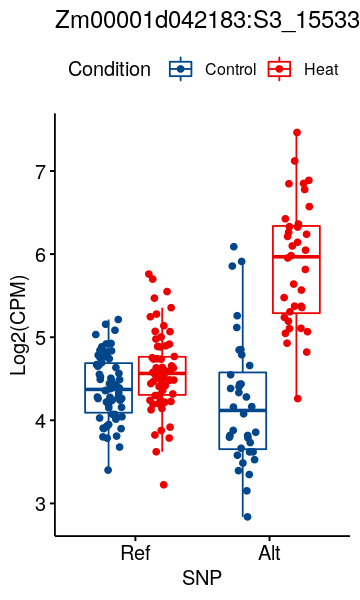

In [18]:
library(ggpubr)
options(repr.plot.width=3, repr.plot.height=5)
x4 = ggboxplot(data4, "SNP", "TransValue", color = "Condition", add = "jitter") + 
    scale_color_lancet()+ ylab("Log2(CPM)") + ggtitle("Zm00001d042183:S3_155333793")
x4
svg("04052022-cases-reQTLs/Zm00001d042183:S3_155333793.svg", width=3, height=5)
x4
dev.off()

In [86]:
options(repr.plot.width=12, repr.plot.height=4)
svg("fourrepcases-reQTL-examples.svg",width=12,height=4)
ggarrange(x1,x2,x3,x4,ncol=4)
dev.off()

png 
  2

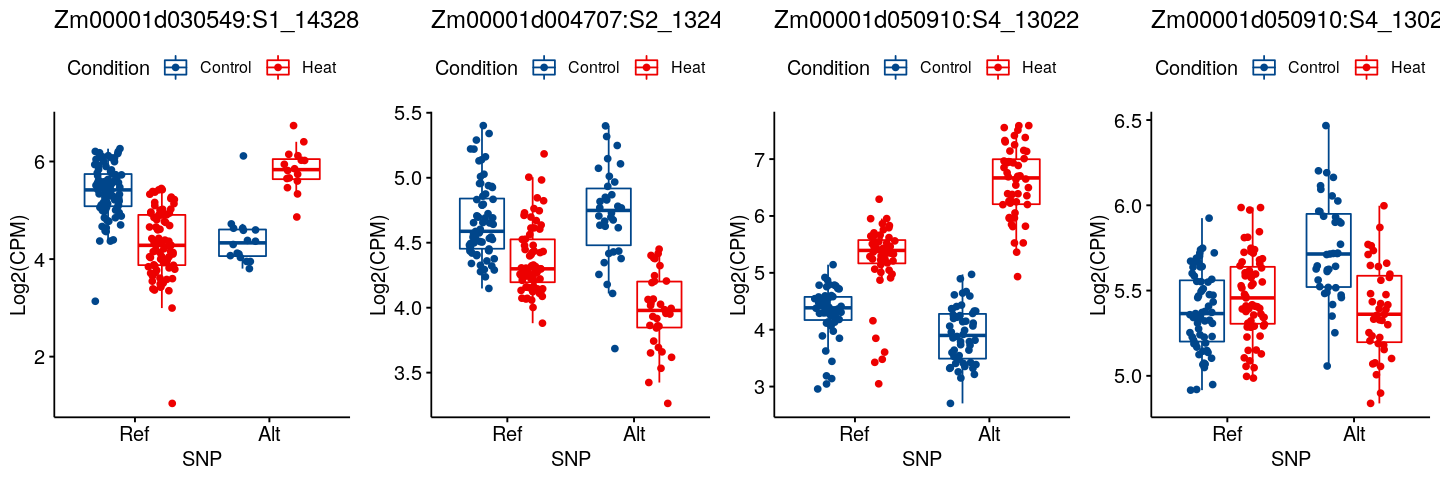

In [84]:
options(repr.plot.width=12, repr.plot.height=4)
ggarrange(x1,x2,x3,x4,ncol=4)

png 
  2

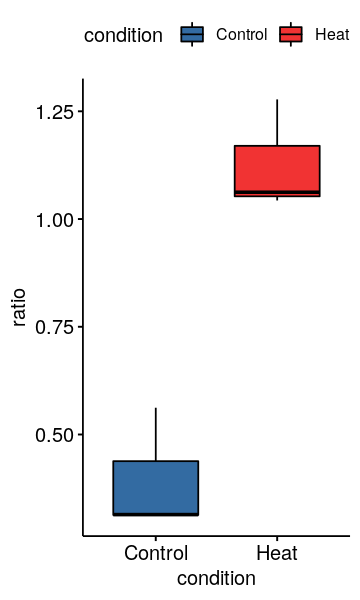

png 
  2

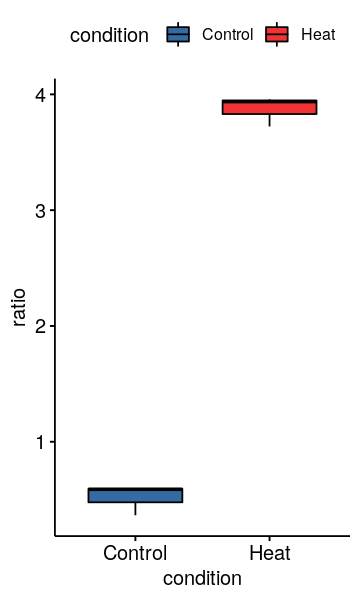

In [19]:
ratio = c(60/192, 49/156, 86/153, 847/812, 718/562, 427/402)
condition = c(rep("Control",3),rep("Heat",3))
df = data.frame(condition, ratio)
x = ggboxplot(df, "condition", "ratio",
     fill = "condition", alpha=0.8) + scale_fill_lancet()
x
svg("04052022-cases-reQTLs/Zm00001d005114-MB.svg", width=3, height=5)
x
dev.off()

ratio = c(204/346, 140/234, 107/293, 3138/797, 3984/1007, 4281/1150)
condition = c(rep("Control",3),rep("Heat",3))
df = data.frame(condition, ratio)
x = ggboxplot(df, "condition", "ratio",
     fill = "condition", alpha=0.8) + scale_fill_lancet()
x
svg("04052022-cases-reQTLs/Zm00001d042183-OB.svg", width=3, height=5)
x
dev.off()

rep,genotype,value
<fct>,<fct>,<dbl>
1,Mo17,3.35
2,Mo17,3.23
1,Mo17,2.72
2,Mo17,2.47
1,Mo17,2.28
2,Mo17,2.20
1,B73,2.26
2,B73,2.23
1,B73,1.81


png 
  2

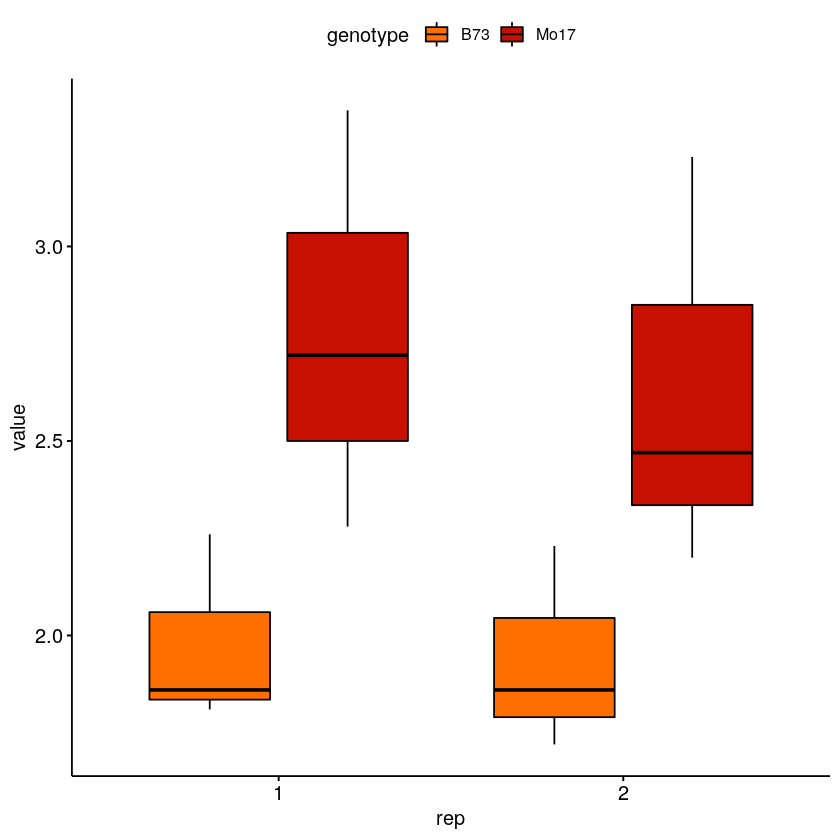

png 
  2

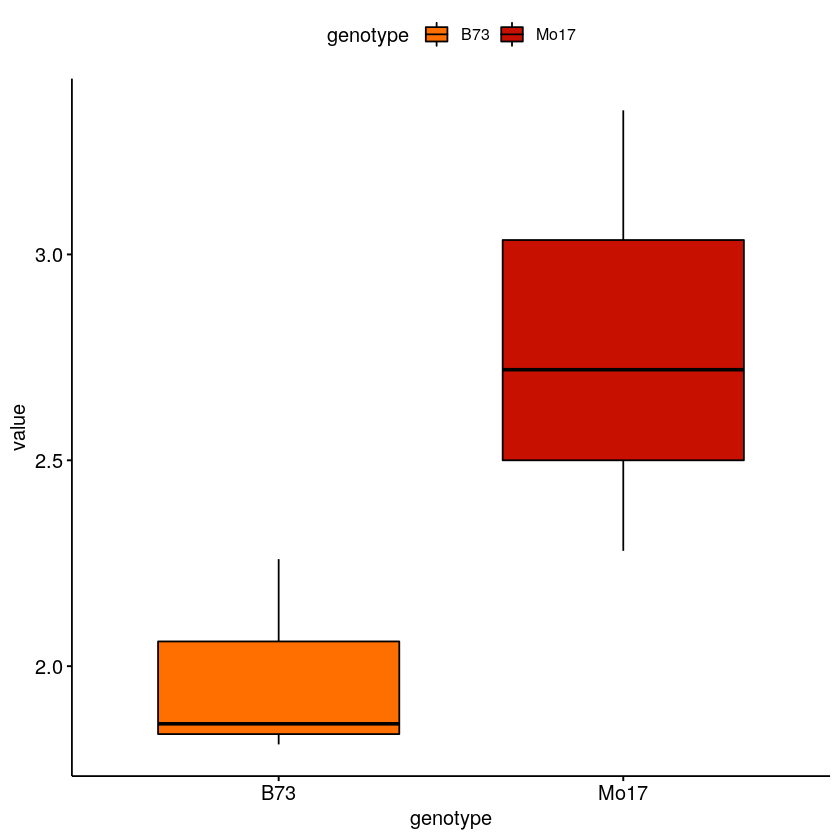

In [3]:
# DUAL assay
value = c(3.35, 3.23, 2.72, 2.47, 2.28, 2.20, 2.26, 2.23, 1.81, 1.72, 1.86, 1.86)
genotype = c(rep("Mo17", 6), rep("B73", 6))
rep = c(rep(c('1','2'),6))
data1 = data.frame(rep, genotype, value)
data1
x = ggboxplot(data1, "rep", "value", fill = "genotype") + scale_fill_futurama()
x
svg("04052022-cases-reQTLs/Zm00001d005114-DUAL.svg", width=3, height=5)
x
dev.off()

value = c(3.35, 2.72, 2.28, 2.26, 1.81, 1.86)
genotype = c(rep("Mo17", 3), rep("B73", 3))
data1 = data.frame(genotype, value)
x = ggboxplot(data1, "genotype", "value", fill = "genotype") + scale_fill_futurama()
x
svg("04052022-cases-reQTLs/Zm00001d005114-DUAL-single.svg", width=3, height=5)
x
dev.off()

In [2]:
t.test(c(3.23, 2.47, 2.20, 3.35, 2.72, 2.28), c(2.23, 1.72, 1.86,2.26, 1.81, 1.86), paired=TRUE)
t.test(c(3.23, 2.47, 2.20), c(2.23, 1.72, 1.86), paired = TRUE)
t.test(c(3.35, 2.72, 2.28), c(2.26, 1.81, 1.86), paired = TRUE)
t.test(c(508,630,588),c(7.5,17.1,9.0), paired=TRUE)
t.test(c(3.6,2.4,4.2),c(1.5,1.1,2.5), paired=TRUE)


	Paired t-test

data:  c(3.23, 2.47, 2.2, 3.35, 2.72, 2.28) and c(2.23, 1.72, 1.86, 2.26, 1.81, 1.86)
t = 5.9382, df = 5, p-value = 0.001934
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4262796 1.0770538
sample estimates:
mean of the differences 
              0.7516667 



	Paired t-test

data:  c(3.23, 2.47, 2.2) and c(2.23, 1.72, 1.86)
t = 3.6213, df = 2, p-value = 0.06851
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1310894  1.5244227
sample estimates:
mean of the differences 
              0.6966667 



	Paired t-test

data:  c(3.35, 2.72, 2.28) and c(2.26, 1.81, 1.86)
t = 4.0294, df = 2, p-value = 0.05643
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0547001  1.6680334
sample estimates:
mean of the differences 
              0.8066667 



	Paired t-test

data:  c(508, 630, 588) and c(7.5, 17.1, 9)
t = 16.947, df = 2, p-value = 0.003464
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 420.9081 707.3585
sample estimates:
mean of the differences 
               564.1333 



	Paired t-test

data:  c(3.6, 2.4, 4.2) and c(1.5, 1.1, 2.5)
t = 7.3612, df = 2, p-value = 0.01796
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7063449 2.6936551
sample estimates:
mean of the differences 
                    1.7 


png 
  2

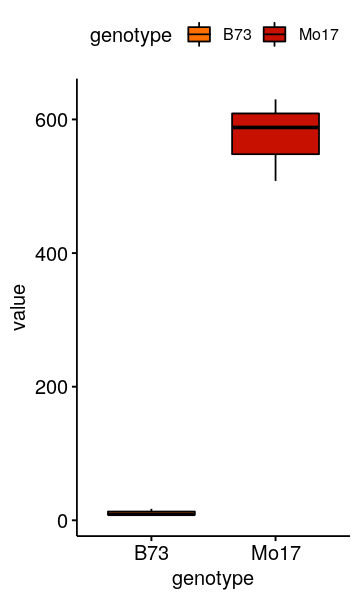

png 
  2

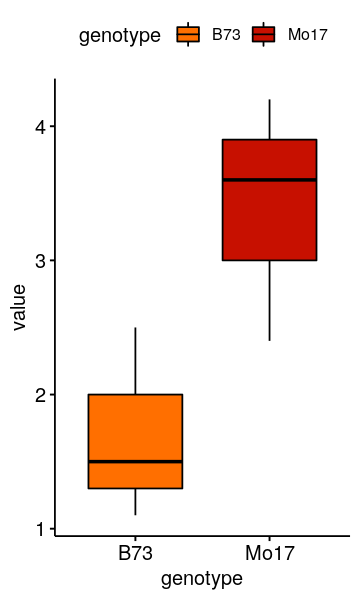

In [27]:
# DUAL assay #Zm00001d017187
value = c(508,630,588,7.5,17.1,9.0)
genotype = c(rep("Mo17",3), rep("B73", 3))
data1 = data.frame(genotype, value)
x = ggboxplot(data1, "genotype", "value", fill = "genotype") + scale_fill_futurama()
x
svg("04052022-cases-reQTLs/Zm00001d017187-DUAL.svg", width=3, height=5)
x
dev.off()

# DUAL assay #Zm00001d042183
value = c(3.6,2.4,4.2,1.5,1.1,2.5)
genotype = c(rep("Mo17",3), rep("B73", 3))
data1 = data.frame(genotype, value)
x = ggboxplot(data1, "genotype", "value", fill = "genotype") + scale_fill_futurama()
x
svg("04052022-cases-reQTLs/Zm00001d042183-DUAL.svg", width=3, height=5)
x
dev.off()

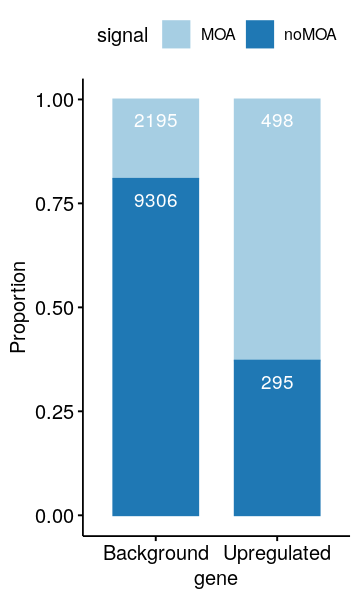

png 
  2

png 
  2

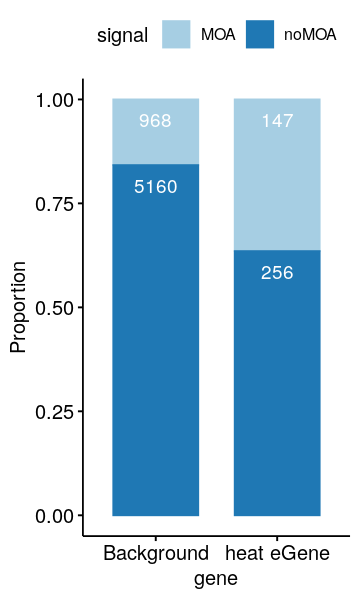

In [4]:
# enrichment for upregulated genes
options(repr.plot.width=3, repr.plot.height=5)
number = c(2195, 9306, 498, 295)
gene = c("Background","Background","Upregulated","Upregulated")
signal = c("MOA","noMOA","MOA","noMOA")
df2 = data.frame(cbind(number, gene, signal))
df2$number = as.numeric(as.character(df2$number))
df3 = df2 %>% group_by(gene) %>% mutate(Proportion = number/sum(number)) %>% ungroup()
x = ggbarplot(df3, "gene", "Proportion",
  fill = "signal", color = "signal", palette = "Paired",
  label = number, lab.col = "white", lab.pos = "in")
x
# enrichment for genes with heat-ciseQTL
options(repr.plot.width=3, repr.plot.height=5)
number = c(968, 5160, 147, 256)
gene = c("Background","Background","heat eGene","heat eGene")
signal = c("MOA","noMOA","MOA","noMOA")
df2 = data.frame(cbind(number, gene, signal))
df2$number = as.numeric(as.character(df2$number))
df3 = df2 %>% group_by(gene) %>% mutate(Proportion = number/sum(number)) %>% ungroup()
y = ggbarplot(df3, "gene", "Proportion",
  fill = "signal", color = "signal", palette = "Paired",
  label = number, lab.col = "white", lab.pos = "in")
y
svg("MOAtest-upregulated-gene.svg",width=3, height=5)
x
dev.off()

svg("MOAtest-heateGene.svg",width=3, height=5)
y
dev.off()

In [54]:
fisher.test(matrix(c(c(2195, 9306), c(498, 295)),ncol=2))


	Fisher's Exact Test for Count Data

data:  matrix(c(c(2195, 9306), c(498, 295)), ncol = 2)
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.1197132 0.1629598
sample estimates:
odds ratio 
 0.1397565 
